#### Importing relevant Libraries

In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# Load your data with the updated path
data = pd.read_excel(r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx', index_col='time', parse_dates=True)

# Select the columns for analysis
rain_data = data['Mean_Rainfall']

# Resample the data to monthly frequency and calculate the mean
monthly_rain_data = rain_data.resample('M').sum()


C:\Users\harsh\AppData\Local\Temp\ipykernel_5164\594486191.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rain_data = rain_data.resample('M').sum()


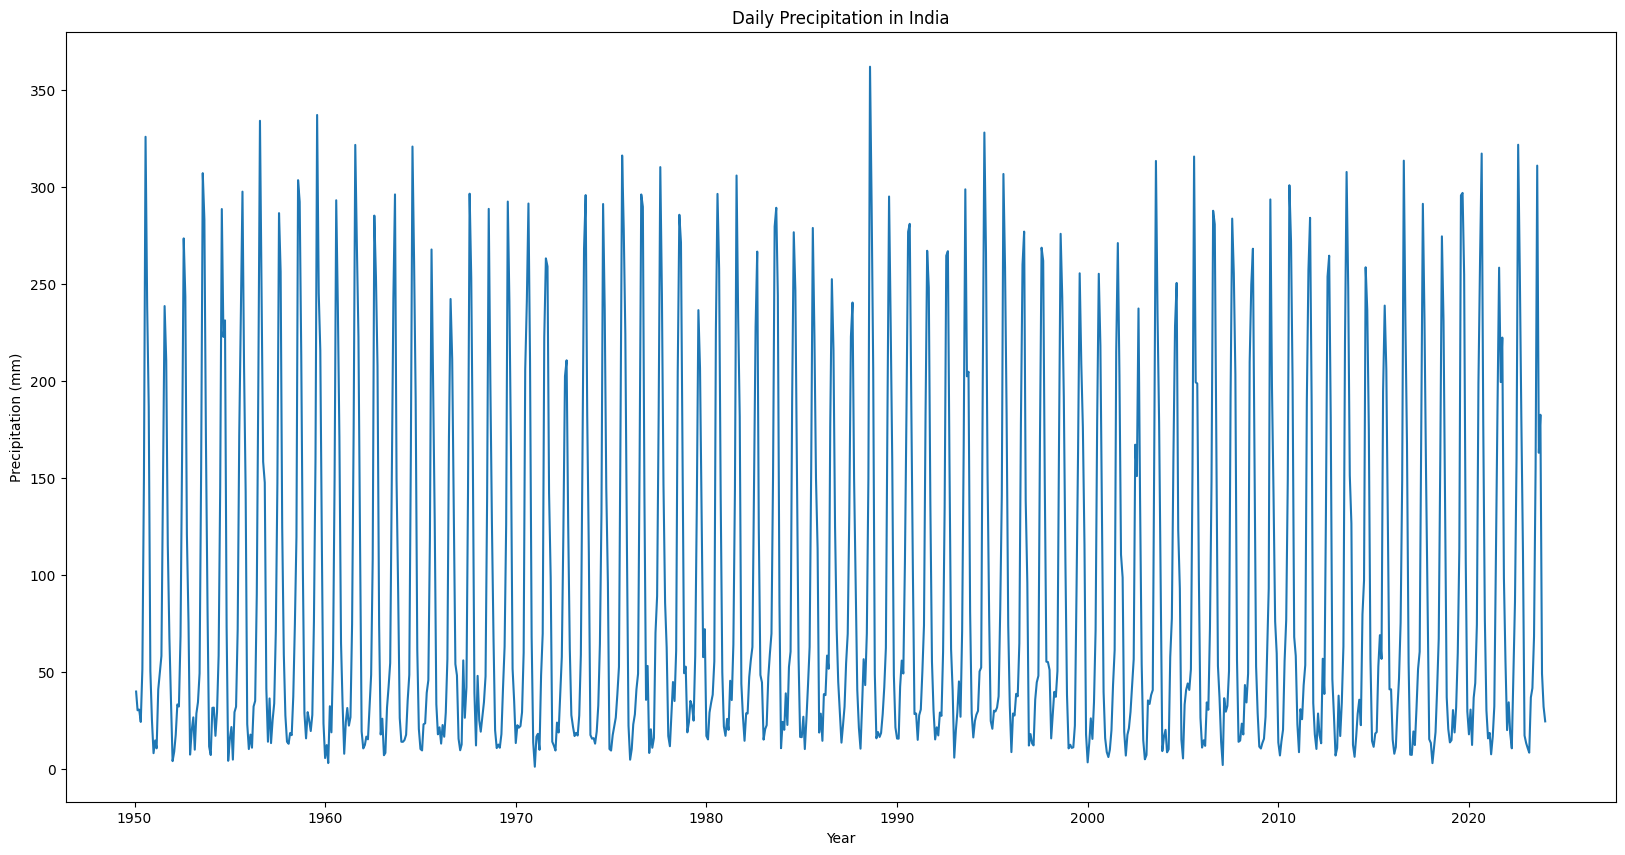

In [10]:
# Plot the monthly resampled rainfall data
plt.figure(figsize=(20, 10))
plt.plot(monthly_rain_data)
plt.title('Daily Precipitation in India')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.show()

In [11]:
# Check for stationarity
result_india = adfuller(monthly_rain_data)
print('India ADF Statistic:', result_india[0])
print('India p-value:', result_india[1])

India ADF Statistic: -8.170746147570837
India p-value: 8.636300880862731e-13


##### Conclusion: Data is Stationary

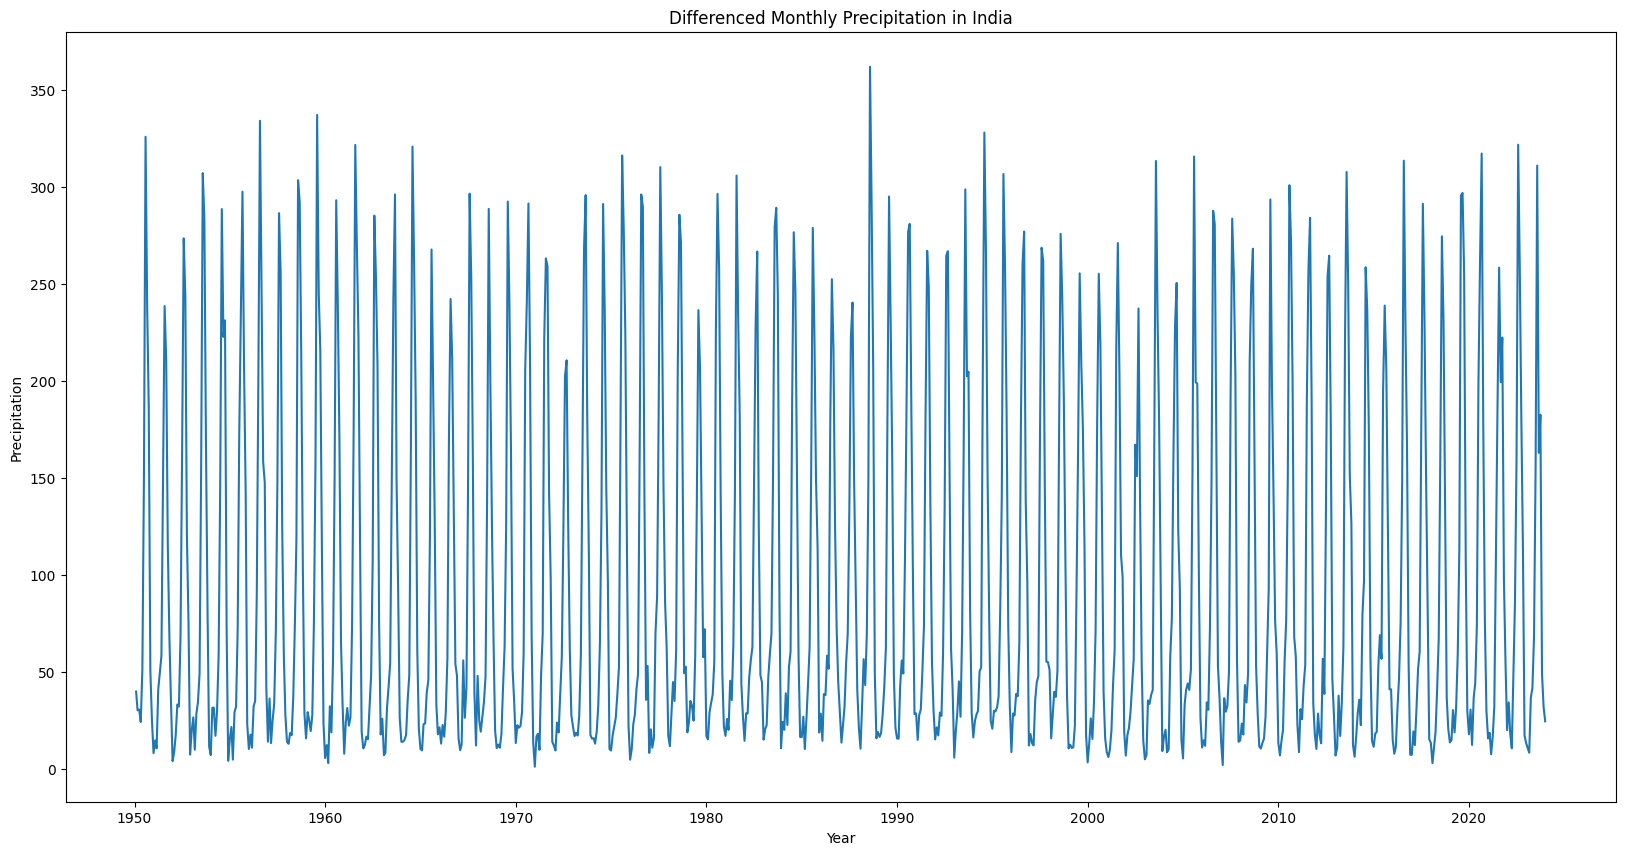

In [12]:
# Check if the p-value indicates non-stationarity
if result_india[1] > 0.05:
    # If the series is non-stationary, perform differencing to achieve stationarity
    india_data_diff = monthly_rain_data.diff().dropna()  # Calculate the first difference and remove NaN values
    # Perform the ADF test on the differenced data
    result_india_diff = adfuller(india_data_diff)
    print('India Differenced ADF Statistic:', result_india_diff[0])  # Print the ADF statistic for the differenced data
    print('India Differenced p-value:', result_india_diff[1])  # Print the p-value for the differenced data
else:
    # If the series is already stationary, use the original data
    india_data_diff = monthly_rain_data

# Create a plot for the differenced monthly precipitation data
plt.figure(figsize=(20, 10))  # Set the figure size for better visibility
plt.plot(india_data_diff)  # Plot the differenced data
plt.title('Differenced Monthly Precipitation in India')  # Title of the plot
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Precipitation')  # Label for the y-axis
plt.show()  # Display the plot


In [13]:

# Fit the ARMA(1, 1) model
model_india = ARIMA(india_data_diff, order=(1, 0, 1))
model_india_fit = model_india.fit()

# Print the model summary
print(model_india_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  888
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4818.172
Date:                Tue, 22 Oct 2024   AIC                           9644.344
Time:                        01:19:55   BIC                           9663.500
Sample:                    01-31-1950   HQIC                          9651.667
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.1490     10.425      9.127      0.000      74.717     115.581
ar.L1          0.6202      0.042     14.883      0.000       0.539       0.702
ma.L1          0.4538      0.041     11.039      0.0

In [16]:
# Determine the starting point for predictions based on the length of the differenced data
start_india = len(india_data_diff)  # Get the number of observations in the differenced data

# Calculate the end index for predictions
# 74 years from 1950 to 2023 means 74 years * 12 months per year for monthly predictions
end_india = start_india + (74 * 12)

# Generate predictions for the specified range using the fitted ARIMA model
predictions_india = model_india_fit.predict(start=start_india, end=end_india)

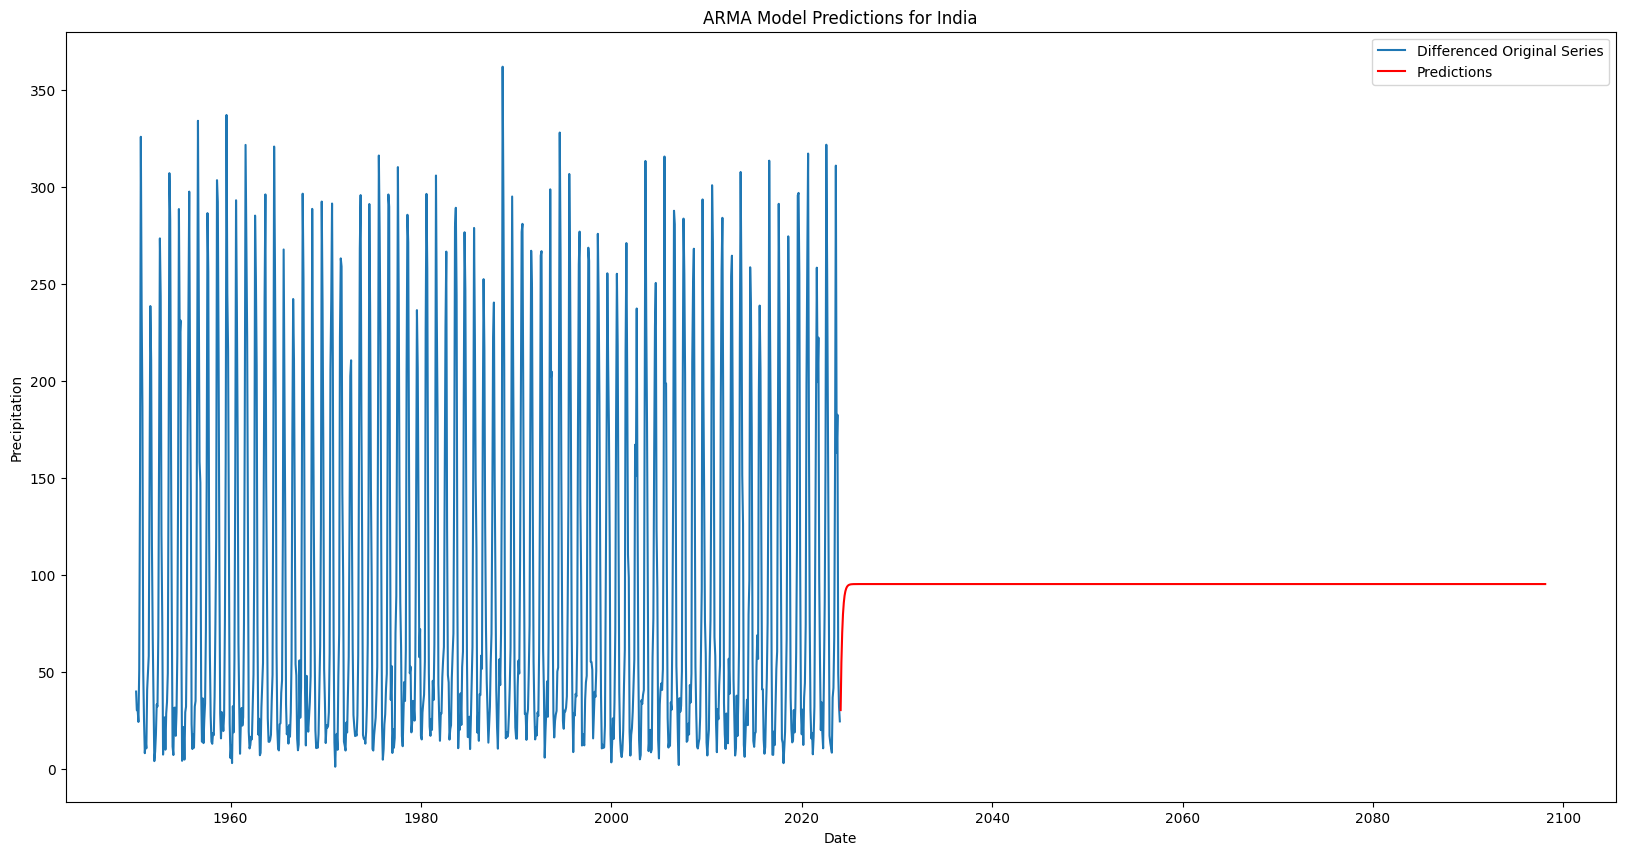

In [17]:
# Plot the results
plt.figure(figsize=(20,10))
plt.plot(india_data_diff, label='Differenced Original Series')
plt.plot(predictions_india, label='Predictions', color='red')
plt.legend()
plt.title('ARMA Model Predictions for India')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

In [19]:
# Initialize variables to store the best AIC value and corresponding model parameters
best_aic = float('inf')  # Start with the highest possible AIC value
best_order_india = None  # Placeholder for the best order of the ARIMA model
best_model_india = None  # Placeholder for the best fitted ARIMA model

# Loop over a range of values for the AR (p) and MA (q) parameters
for p in range(6):  # AR parameter
    for q in range(6):  # MA parameter
        try:
            # Fit an ARIMA model with the specified order (p, 0, q)
            model = ARIMA(india_data_diff, order=(p, 0, q))
            model_fit = model.fit()  # Fit the model to the differenced data
            
            # Check if the current model's AIC is better (lower) than the best AIC found so far
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic  # Update the best AIC value
                best_order_india = (p, 0, q)  # Store the current order as the best order
                best_model_india = model_fit  # Store the current fitted model as the best model
        except Exception as e:
            # Handle any exceptions that occur during model fitting
            print(f"Error fitting ARMA({p}, 0, {q}): {str(e)}")

# Output the best ARMA order found and its corresponding AIC value
print('Best ARMA order for India:', best_order_india)
print('Best AIC:', best_aic)

# If a valid model was found, print its summary; otherwise, indicate no valid model was found
if best_model_india is not None:
    print(best_model_india.summary())  # Print a summary of the best model's results
else:
    print("No valid model was found.")

c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible st

Best ARMA order for India: (4, 0, 4)
Best AIC: 8527.435845418251
                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  888
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -4253.718
Date:                Tue, 22 Oct 2024   AIC                           8527.436
Time:                        01:23:08   BIC                           8575.326
Sample:                    01-31-1950   HQIC                          8545.742
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.1697      1.976     48.169      0.000      91.297      99.042
ar.L1          2.7277      0.006    427.392      0.000       2.715

c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\harsh\AppData\Local\Temp\ipykernel_5164\1200623539.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=india_data_diff.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='M')


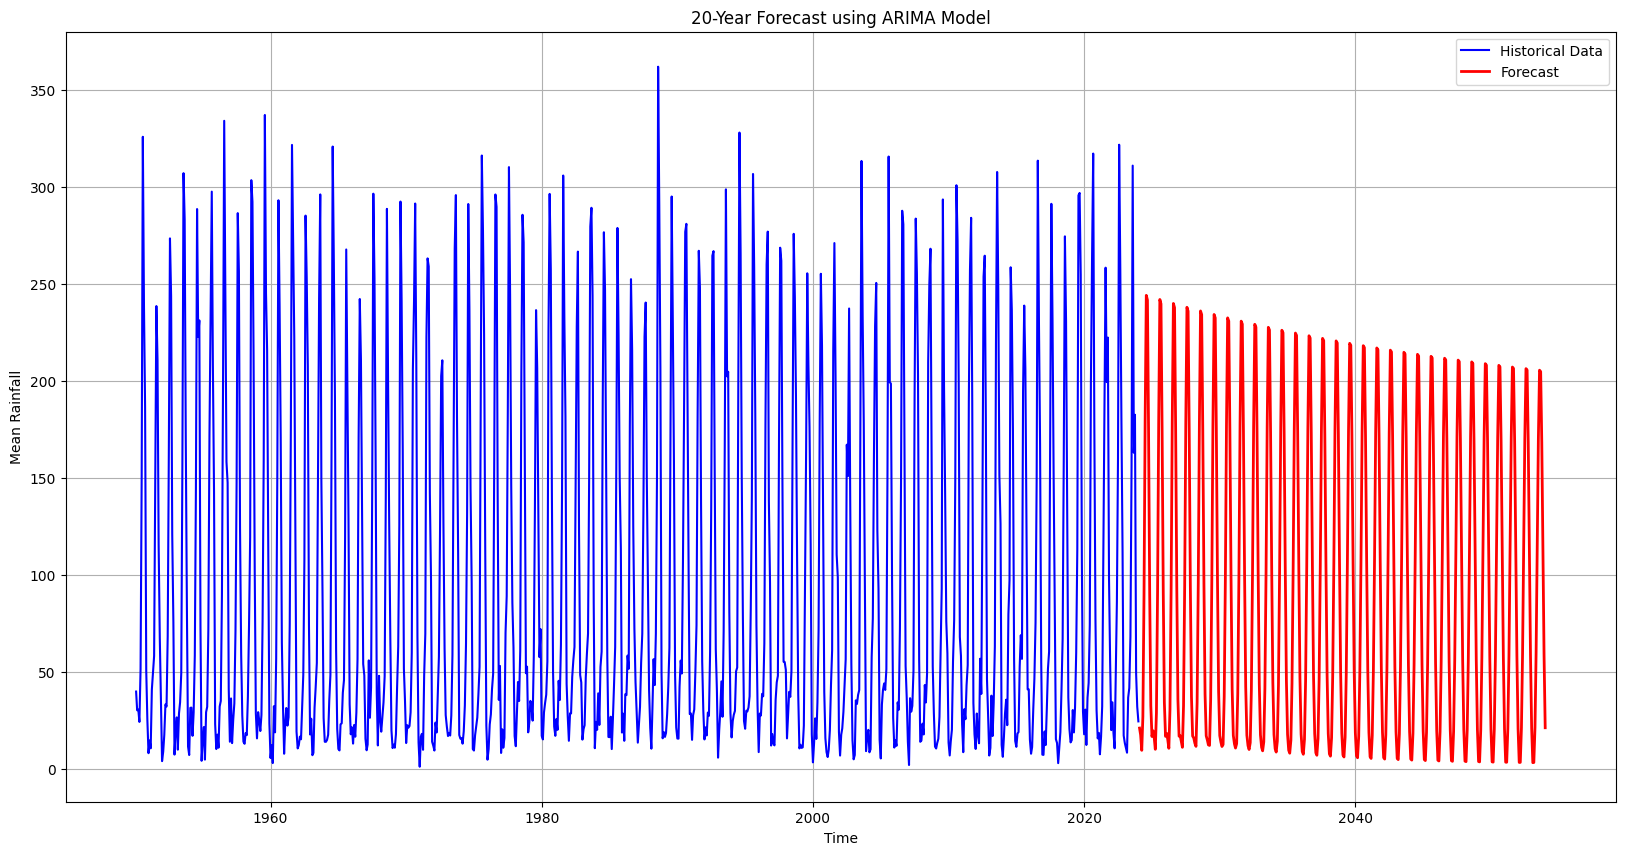

In [22]:
# Forecasting the next 30 years 
forecast_period = (30*12)  # Change based on your data frequency
forecast = best_model_india.get_forecast(steps=forecast_period)
forecast_index = pd.date_range(start=india_data_diff.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='M')
forecast_values = forecast.predicted_mean

# Plotting the historical data and forecast
plt.figure(figsize=(20,10))
plt.plot(india_data_diff.index, india_data_diff, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red', linewidth=2)  # Single line for forecast

plt.title('20-Year Forecast using ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Mean Rainfall')
plt.legend()
plt.grid()
plt.show()


In [24]:
# Load your data
data = pd.read_excel(r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx', index_col='time', parse_dates=True)

# Select the columns for analysis and resample to monthly frequency
monthly_rain_data = data['Mean_Rainfall'].resample('M').sum()

# Split the data into train (80%) and test (20%) sets
train_data = monthly_rain_data[:'2010-12-31']
test_data = monthly_rain_data['2011-01-01':]

C:\Users\harsh\AppData\Local\Temp\ipykernel_5164\2447231469.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rain_data = data['Mean_Rainfall'].resample('M').sum()


In [25]:
# # Check for stationarity and difference if necessary
# def check_stationarity(data):
#     result = adfuller(data)
#     if result[1] > 0.05:
#         return data.diff().dropna()
#     return data

# train_result_india = adfuller(train_data)
# print('India ADF Statistic train:', train_result_india[0])
# print('India p-value train:', train_result_india[1])

# test_result_india = adfuller(test_data)
# print('India ADF Statistic test:', test_result_india[0])
# print('India p-value test:', test_result_india[1])

# train_data_diff = check_stationarity(train_data)
# test_data_diff = check_stationarity(test_data)

# print('After India ADF Statistic train:', adfuller(train_data_diff)[0])
# print('After India p-value train:', adfuller(train_data_diff)[1])

# test_result_india = adfuller(test_data)
# print('After India ADF Statistic test:', adfuller(test_data_diff)[0])
# print('After India p-value test:',adfuller(test_data_diff)[1])

train_data_diff = train_data
test_data_diff = test_data


In [26]:
def find_best_arma(data):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    for p in range(6):
        for q in range(6):
            try:
                model = ARIMA(data, order=(p, 0, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, 0, q)
                    best_model = model_fit
            except Exception as e:
                continue
    
    return best_model, best_order

# Find the best ARMA model
best_model, best_order = find_best_arma(train_data_diff)

print('Best ARMA order:', best_order)
print('Best AIC:', best_model.aic)
print(best_model.summary())

c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible st

Best ARMA order: (4, 0, 4)
Best AIC: 7018.921565970171
                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  732
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -3499.461
Date:                Tue, 22 Oct 2024   AIC                           7018.922
Time:                        01:29:16   BIC                           7064.879
Sample:                    01-31-1950   HQIC                          7036.650
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.0937      2.225     42.739      0.000      90.733      99.455
ar.L1          2.7295      0.004    690.661      0.000       2.722       2.7

c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error: 812.5263420489756
Root Mean Squared Error: 28.5048476938393
Mean Absolute Error: 20.38979393666819
R-squared Score: 0.9083317767961745


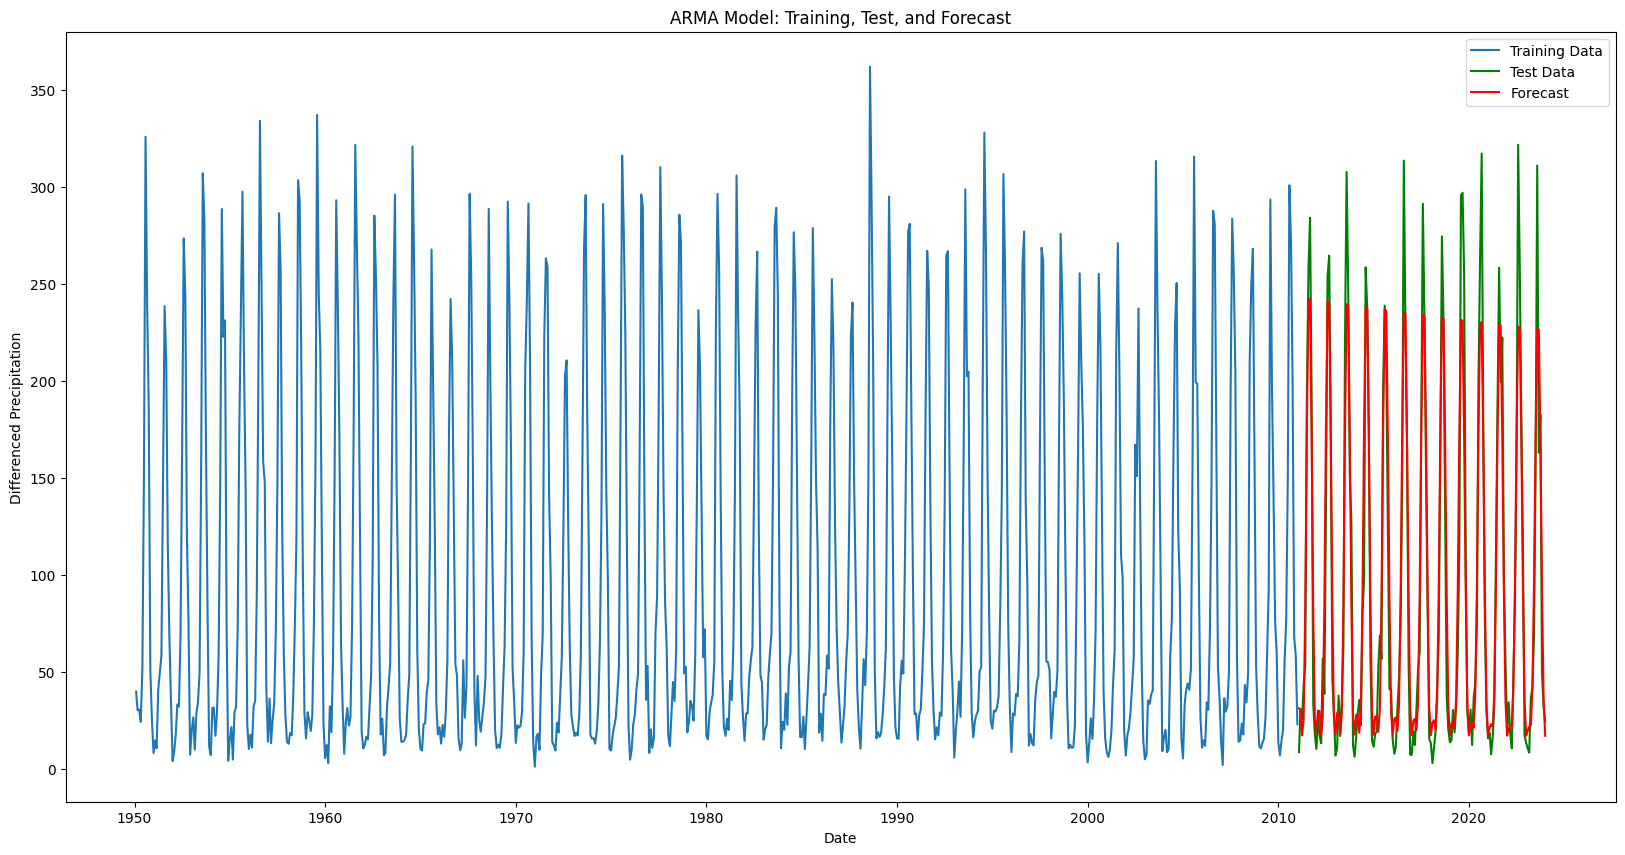

In [27]:
# Forecast for the test period
forecast = best_model.get_forecast(steps=len(test_data_diff))
forecast_mean = forecast.predicted_mean

# Calculate accuracy metrics
mse = mean_squared_error(test_data_diff, forecast_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_diff, forecast_mean)
r2 = r2_score(test_data_diff, forecast_mean)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Plot the results
plt.figure(figsize=(20,10))
plt.plot(train_data_diff.index, train_data_diff, label='Training Data')
plt.plot(test_data_diff.index, test_data_diff, label='Test Data', color='green')
plt.plot(test_data_diff.index, forecast_mean, label='Forecast', color='red')
plt.title('ARMA Model: Training, Test, and Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Precipitation')
plt.legend()
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_5164\1928465769.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rain_data = data['Mean_Rainfall'].resample('M').sum()
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters fo

Best ARMA order: (4, 0, 4)
Best AIC: 2367.4909660772005
                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  240
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1173.745
Date:                Tue, 22 Oct 2024   AIC                           2367.491
Time:                        01:54:38   BIC                           2402.297
Sample:                    01-31-1950   HQIC                          2381.515
                         - 12-31-1969                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.9374      2.763     33.996      0.000      88.522      99.353
ar.L1          2.7192      0.013    207.176      0.000       2.693       2.

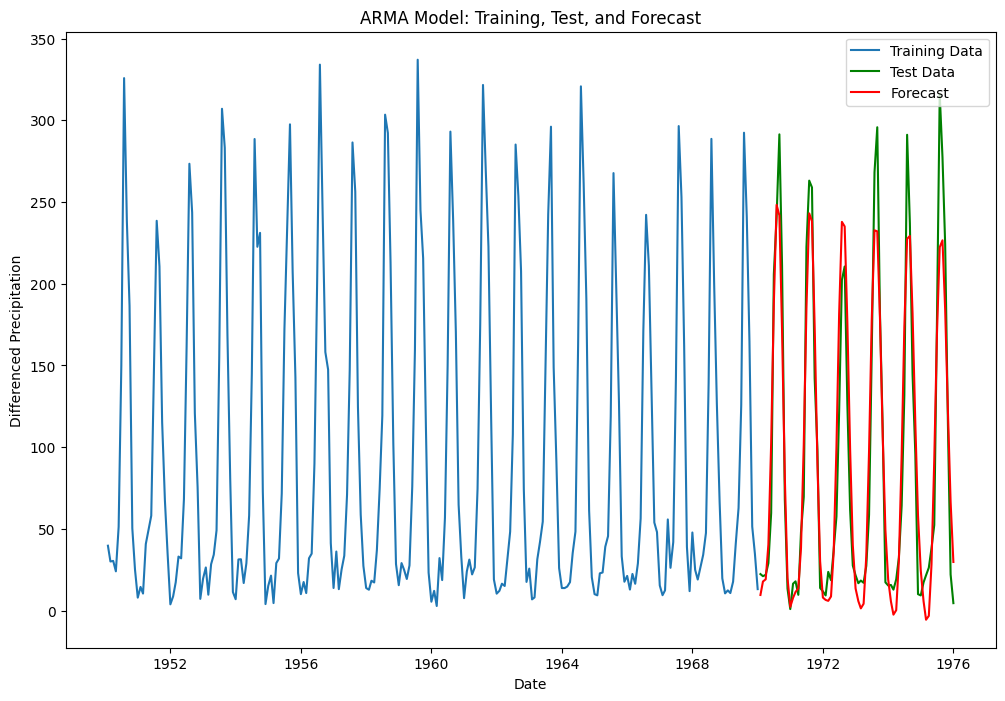

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your data
data = pd.read_excel(r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx', index_col='time', parse_dates=True)

# Select the columns for analysis and resample to monthly frequency
monthly_rain_data = data['Mean_Rainfall'].resample('M').sum()

# Split the data into train (80%) and test (20%) sets
train_data_1 = monthly_rain_data['1950-01-01':'1969-12-31']
test_data_1 = monthly_rain_data['1970-01-01':'1975-12-31']

train_data_diff_1 = train_data_1
test_data_diff_1 = test_data_1

def find_best_arma(data):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    for p in range(6):
        for q in range(6):
            try:
                model = ARIMA(data, order=(p, 0, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, 0, q)
                    best_model = model_fit
            except Exception as e:
                continue
    
    return best_model, best_order

# Find the best ARMA model
best_model, best_order = find_best_arma(train_data_diff_1)

print('Best ARMA order:', best_order)
print('Best AIC:', best_model.aic)
print(best_model.summary())

# Forecast for the test period
forecast = best_model.get_forecast(steps=len(test_data_diff_1))  # Ensure correct length for forecast
forecast_mean = forecast.predicted_mean

# Calculate accuracy metrics
mse = mean_squared_error(test_data_diff_1, forecast_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_diff_1, forecast_mean)
r2 = r2_score(test_data_diff_1, forecast_mean)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Plot the results
plt.figure(figsize=(12,8))
plt.plot(train_data_diff_1.index, train_data_diff_1, label='Training Data')
plt.plot(test_data_diff_1.index, test_data_diff_1, label='Test Data', color='green')
plt.plot(test_data_diff_1.index, forecast_mean, label='Forecast', color='red')
plt.title('ARMA Model: Training, Test, and Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Precipitation')
plt.legend()
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_5164\4100597076.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rain_data = data['Mean_Rainfall'].resample('M').sum()
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\

Best ARMA order: (4, 0, 4)
Best AIC: 1178.9306545494867
                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  120
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -579.465
Date:                Tue, 22 Oct 2024   AIC                           1178.931
Time:                        02:05:06   BIC                           1206.806
Sample:                    01-31-1976   HQIC                          1190.251
                         - 12-31-1985                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.0824      3.444     28.190      0.000      90.333     103.832
ar.L1          2.7378      0.020    136.289      0.000       2.698       2.

c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


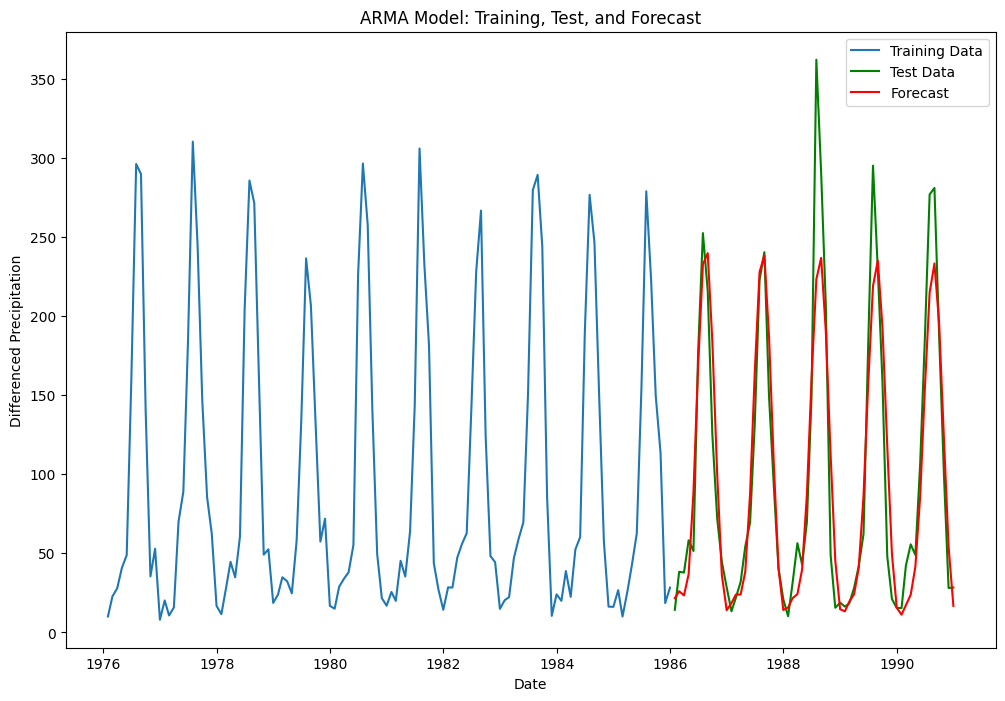

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your data
data = pd.read_excel(r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx', index_col='time', parse_dates=True)

# Select the columns for analysis and resample to monthly frequency
monthly_rain_data = data['Mean_Rainfall'].resample('M').sum()

# Split the data into train (80%) and test (20%) sets
train_data_2 = monthly_rain_data['1976-01-01':'1985-12-31'] 
test_data_2 = monthly_rain_data['1986-01-01':'1990-12-31']

train_data_diff_2 = train_data_2
test_data_diff_2 = test_data_2

def find_best_arma(data):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    for p in range(6):
        for q in range(6):
            try:
                model = ARIMA(data, order=(p, 0, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, 0, q)
                    best_model = model_fit
            except Exception as e:
                continue
    
    return best_model, best_order

# Find the best ARMA model
best_model, best_order = find_best_arma(train_data_diff_2)

print('Best ARMA order:', best_order)
print('Best AIC:', best_model.aic)
print(best_model.summary())

# Forecast for the test period
forecast = best_model.get_forecast(steps=len(test_data_diff_2))  # Ensure correct length for forecast
forecast_mean = forecast.predicted_mean

# Calculate accuracy metrics
mse = mean_squared_error(test_data_diff_2, forecast_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_diff_2, forecast_mean)
r2 = r2_score(test_data_diff_2, forecast_mean)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(train_data_diff_2.index, train_data_diff_2, label='Training Data')
plt.plot(test_data_diff_2.index, test_data_diff_2, label='Test Data', color='green')
plt.plot(test_data_diff_2.index, forecast_mean, label='Forecast', color='red')
plt.title('ARMA Model: Training, Test, and Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Precipitation')
plt.legend()
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_5164\3919902598.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rain_data = data['Mean_Rainfall'].resample('M').sum()
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters fo

Best ARMA order: (4, 0, 4)
Best AIC: 3238.323684536973
                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  336
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1609.162
Date:                Tue, 22 Oct 2024   AIC                           3238.324
Time:                        02:03:49   BIC                           3276.495
Sample:                    01-31-1991   HQIC                          3253.540
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.5253      2.948     31.724      0.000      87.747      99.303
ar.L1          2.7177      0.018    148.497      0.000       2.682       2.7

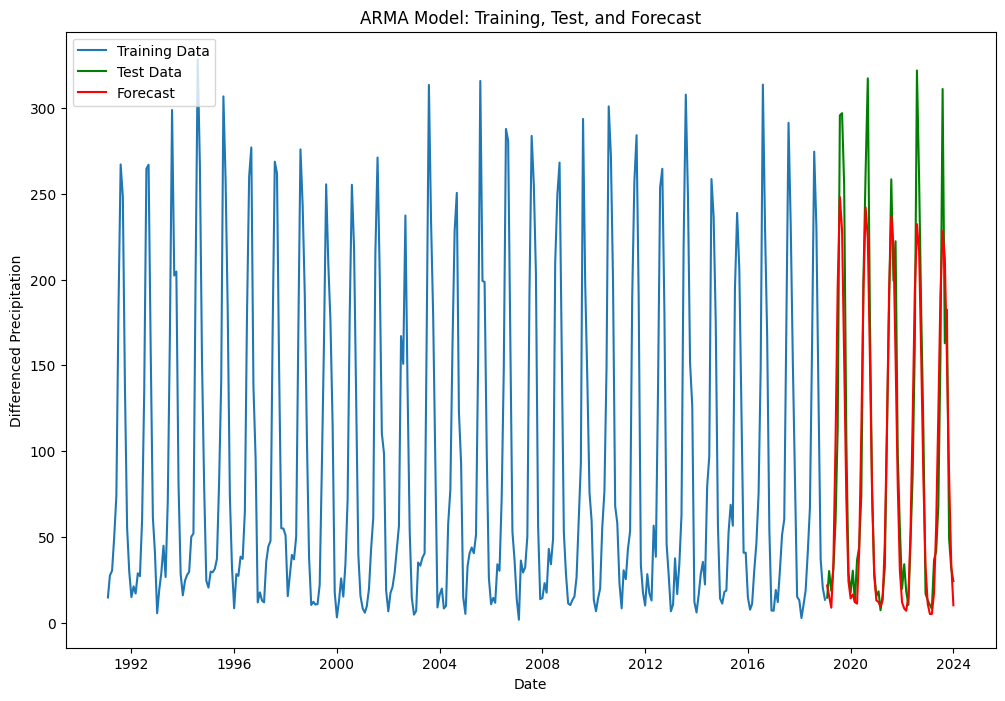

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your data
data = pd.read_excel(r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx', index_col='time', parse_dates=True)

# Select the columns for analysis and resample to monthly frequency
monthly_rain_data = data['Mean_Rainfall'].resample('M').sum()

# Split the data into train (80%) and test (20%) sets
train_data_3 = monthly_rain_data['1991-01-01':'2018-12-31']
test_data_3 = monthly_rain_data['2019-01-01':'2023-12-31']

train_data_diff_3 = train_data_3
test_data_diff_3 = test_data_3

def find_best_arma(data):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    for p in range(6):
        for q in range(6):
            try:
                model = ARIMA(data, order=(p, 0, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, 0, q)
                    best_model = model_fit
            except Exception as e:
                continue
    
    return best_model, best_order

# Find the best ARMA model
best_model, best_order = find_best_arma(train_data_diff_3)

print('Best ARMA order:', best_order)
print('Best AIC:', best_model.aic)
print(best_model.summary())

# Forecast for the test period
forecast = best_model.get_forecast(steps=len(test_data_diff_3))  # Ensure correct length for forecast
forecast_mean = forecast.predicted_mean

# Calculate accuracy metrics
mse = mean_squared_error(test_data_diff_3, forecast_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_diff_3, forecast_mean)
r2 = r2_score(test_data_diff_3, forecast_mean)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(train_data_diff_3.index, train_data_diff_3, label='Training Data')
plt.plot(test_data_diff_3.index, test_data_diff_3, label='Test Data', color='green')
plt.plot(test_data_diff_3.index, forecast_mean, label='Forecast', color='red')
plt.title('ARMA Model: Training, Test, and Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Precipitation')
plt.legend()
plt.show()


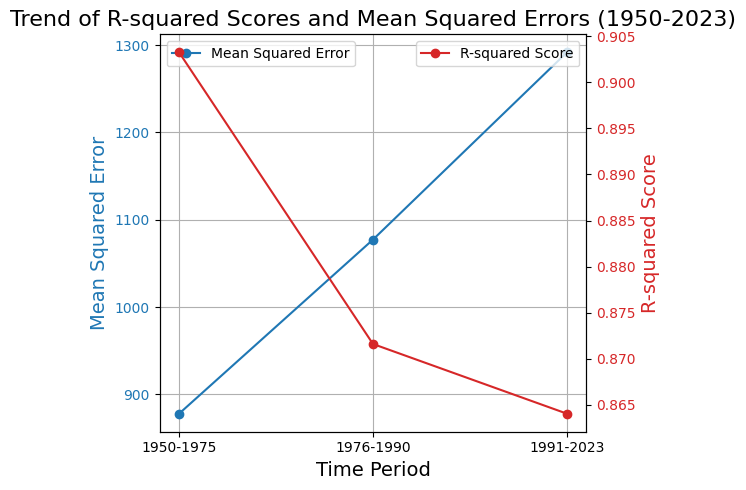

In [66]:
import matplotlib.pyplot as plt

# Data for the years and their respective metrics
years = ['1950-1975', '1976-1990', '1991-2023']
mse = [877.9497428947818, 1077.3131662988671, 1291.6861494895118]
r2_scores = [0.9032665234871123, 0.8715834886445377, 0.8640152003859102]

# Creating a figure and axis
fig, ax1 = plt.subplots(figsize=(6,5))

# Plotting MSE
ax1.set_title('Trend of R-squared Scores and Mean Squared Errors (1950-2023)', fontsize=16)
ax1.set_xlabel('Time Period', fontsize=14)
ax1.set_ylabel('Mean Squared Error', color='tab:blue', fontsize=14)
ax1.plot(years, mse, marker='o', color='tab:blue', label='Mean Squared Error')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis to plot R-squared scores
ax2 = ax1.twinx()
ax2.set_ylabel('R-squared Score', color='tab:red', fontsize=14)
ax2.plot(years, r2_scores, marker='o', color='tab:red', label='R-squared Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding grid and legends
ax1.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


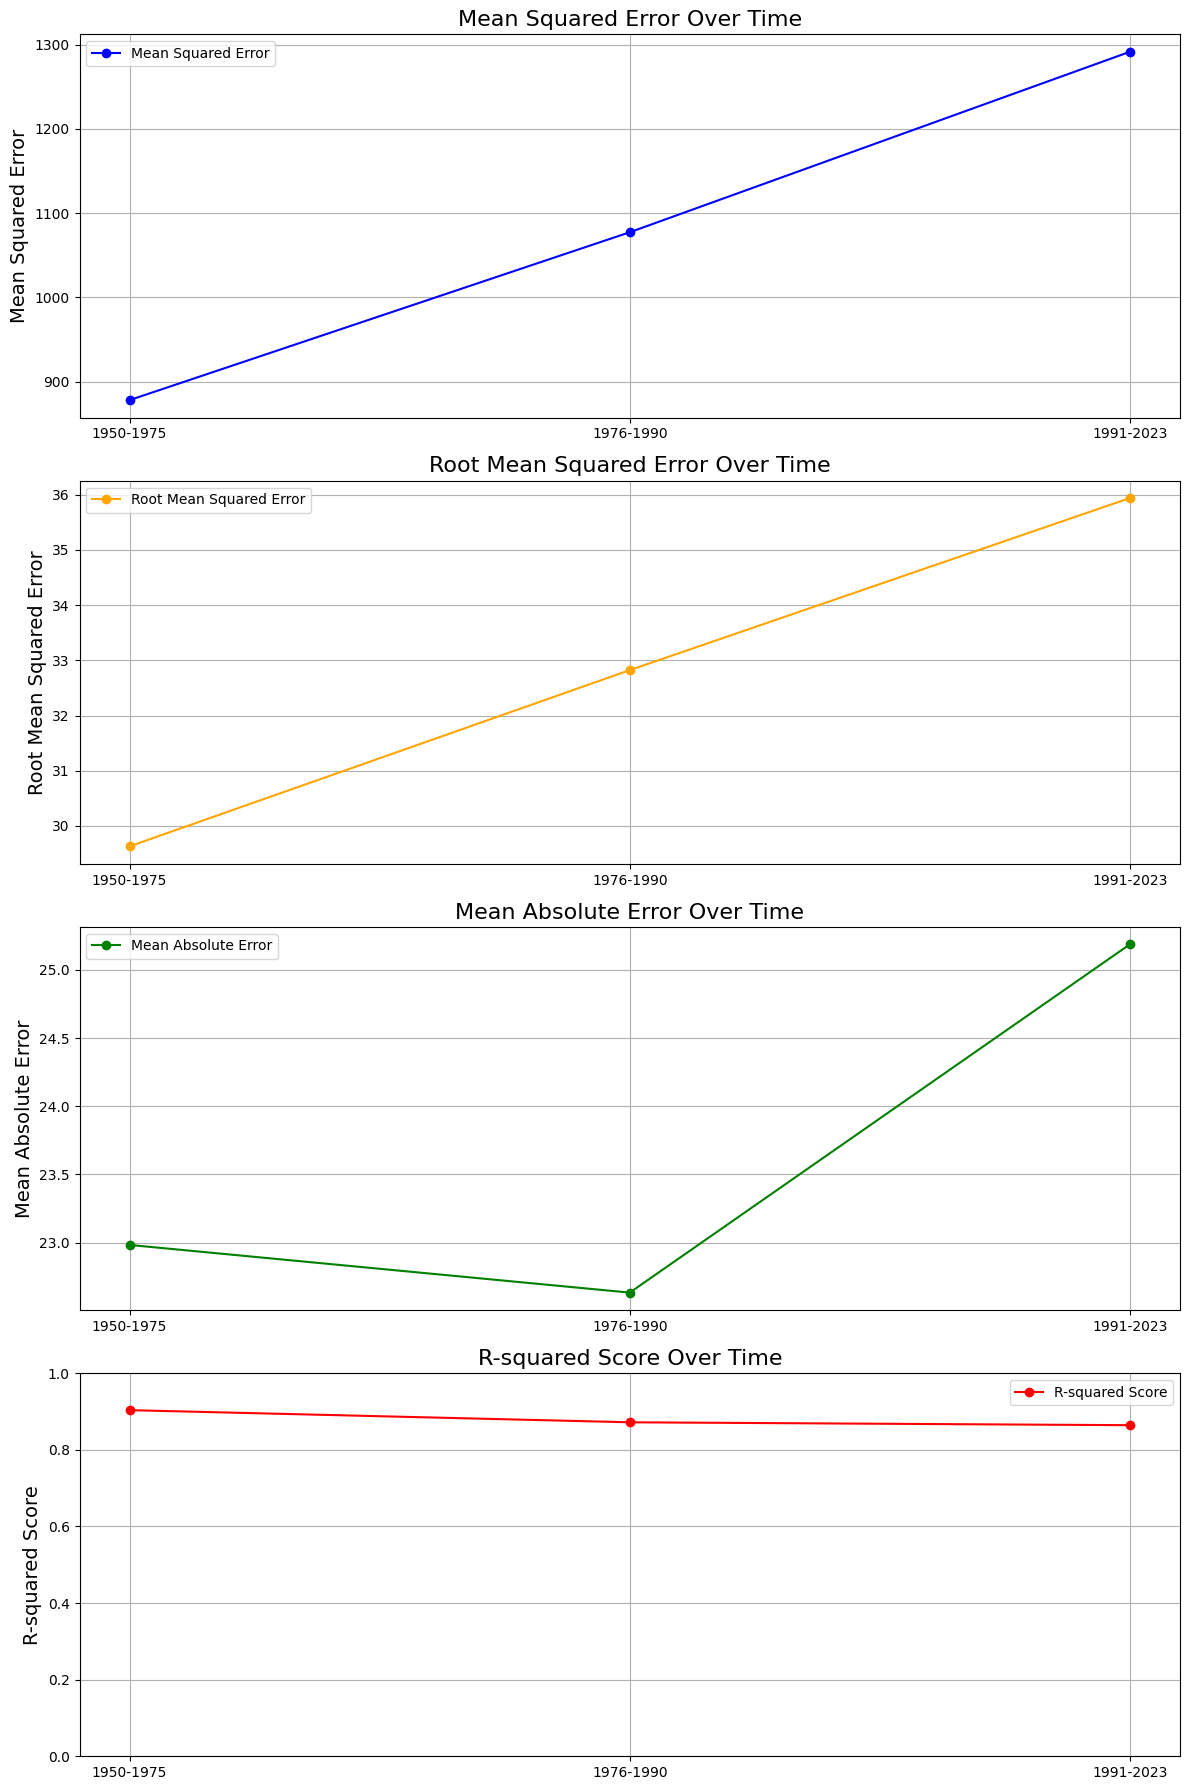

In [64]:
import matplotlib.pyplot as plt

# Data for the years and their respective metrics
years = ['1950-1975', '1976-1990', '1991-2023']
mse = [877.9497428947818, 1077.3131662988671, 1291.6861494895118]
rmse = [29.63021672034786, 32.82244912097309, 35.940035468673535]
mae = [22.982671796647576, 22.633004713289882, 25.188481261349256]
r2_scores = [0.9032665234871123, 0.8715834886445377, 0.8640152003859102]

# Creating a figure with 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 18))

# Plotting Mean Squared Error
axs[0].plot(years, mse, marker='o', color='blue', label='Mean Squared Error')
axs[0].set_title('Mean Squared Error Over Time', fontsize=16)
axs[0].set_ylabel('Mean Squared Error', fontsize=14)
axs[0].grid()
axs[0].legend()

# Plotting Root Mean Squared Error
axs[1].plot(years, rmse, marker='o', color='orange', label='Root Mean Squared Error')
axs[1].set_title('Root Mean Squared Error Over Time', fontsize=16)
axs[1].set_ylabel('Root Mean Squared Error', fontsize=14)
axs[1].grid()
axs[1].legend()

# Plotting Mean Absolute Error
axs[2].plot(years, mae, marker='o', color='green', label='Mean Absolute Error')
axs[2].set_title('Mean Absolute Error Over Time', fontsize=16)
axs[2].set_ylabel('Mean Absolute Error', fontsize=14)
axs[2].grid()
axs[2].legend()

# Plotting R-squared Score
axs[3].plot(years, r2_scores, marker='o', color='red', label='R-squared Score')
axs[3].set_title('R-squared Score Over Time', fontsize=16)
axs[3].set_ylabel('R-squared Score', fontsize=14)
axs[3].set_ylim(0, 1)  # Set limits for R-squared score
axs[3].grid()
axs[3].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



In [5]:
import pandas as pd

# Assuming you've already loaded your data and performed the resampling
# If not, uncomment and modify the following lines:
# data = pd.read_excel(r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx', index_col='time', parse_dates=True)
# rain_data = data['Mean_Rainfall']
# monthly_rain_data = rain_data.resample('M').sum()

# Convert the index to datetime if it's not already
monthly_rain_data.index = pd.to_datetime(monthly_rain_data.index)

# Create a DataFrame with the date as a column
df_export = pd.DataFrame({
    'Date': monthly_rain_data.index.strftime('%Y-%m-%d'),
    'Monthly_Rainfall': monthly_rain_data.values
})

# Export to Excel
output_path = r'C:\Users\harsh\Desktop\Btech_project\Dataset\monthly_imd_rainfall_2003_2023.xlsx'
df_export.to_excel(output_path, index=False)

print(f"Monthly IMD rainfall data has been exported to: {output_path}")

Monthly IMD rainfall data has been exported to: C:\Users\harsh\Desktop\Btech_project\Dataset\monthly_imd_rainfall_2003_2023.xlsx


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you've already run the ARMA model and generated the forecast
# If not, uncomment and modify the following lines:
# best_model, best_order = find_best_arma(train_data_diff)
# forecast = best_model.get_forecast(steps=len(test_data_diff))
# forecast_mean = forecast.predicted_mean

# Create a DataFrame with the forecasted data
forecast_df = pd.DataFrame({
    'Date': test_data_diff.index,
    'Forecasted_Rainfall': forecast_mean.values,
    'Actual_Rainfall': test_data_diff.values
})

# Export to Excel
output_path = r'C:\Users\harsh\Desktop\Btech_project\Dataset\arma_forecast_results.xlsx'
forecast_df.to_excel(output_path, index=False)

print(f"ARMA model forecast results have been exported to: {output_path}")

# Optionally, you can also include the model details and performance metrics
with pd.ExcelWriter(output_path, mode='a') as writer:
    pd.DataFrame({
        'Metric': ['Best ARMA Order', 'Best AIC', 'MSE', 'RMSE', 'MAE', 'R-squared'],
        'Value': [str(best_order), best_model.aic, mse, rmse, mae, r2]
    }).to_excel(writer, sheet_name='Model_Details', index=False)

print("Model details and performance metrics have been added to the Excel file.")

ARMA model forecast results have been exported to: C:\Users\harsh\Desktop\Btech_project\Dataset\arma_forecast_results.xlsx
Model details and performance metrics have been added to the Excel file.
